# Sección 3: Apertura y procesamiento de imágenes

In [1]:
!pip install rasterio matplotlib numpy

## Sección 3.1: Importación y apertura de imágenes

In [2]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
path_imagen1 = "../datos/Imagen1/T34SGH_20241125T091321_"

B01 = rasterio.open(path_imagen1 + 'B01.jp2')
B02 = rasterio.open(path_imagen1 + 'B02.jp2')
B03 = rasterio.open(path_imagen1 + 'B03.jp2')
B04 = rasterio.open(path_imagen1 + 'B04.jp2')
B05 = rasterio.open(path_imagen1 + 'B05.jp2')
B06 = rasterio.open(path_imagen1 + 'B06.jp2')
B07 = rasterio.open(path_imagen1 + 'B07.jp2')
B08 = rasterio.open(path_imagen1 + 'B08.jp2')
B09 = rasterio.open(path_imagen1 + 'B09.jp2')
B10 = rasterio.open(path_imagen1 + 'B10.jp2')
B11 = rasterio.open(path_imagen1 + 'B11.jp2')
B12 = rasterio.open(path_imagen1 + 'B12.jp2')

## Sección 3.2: Visualización inicial de las bandas

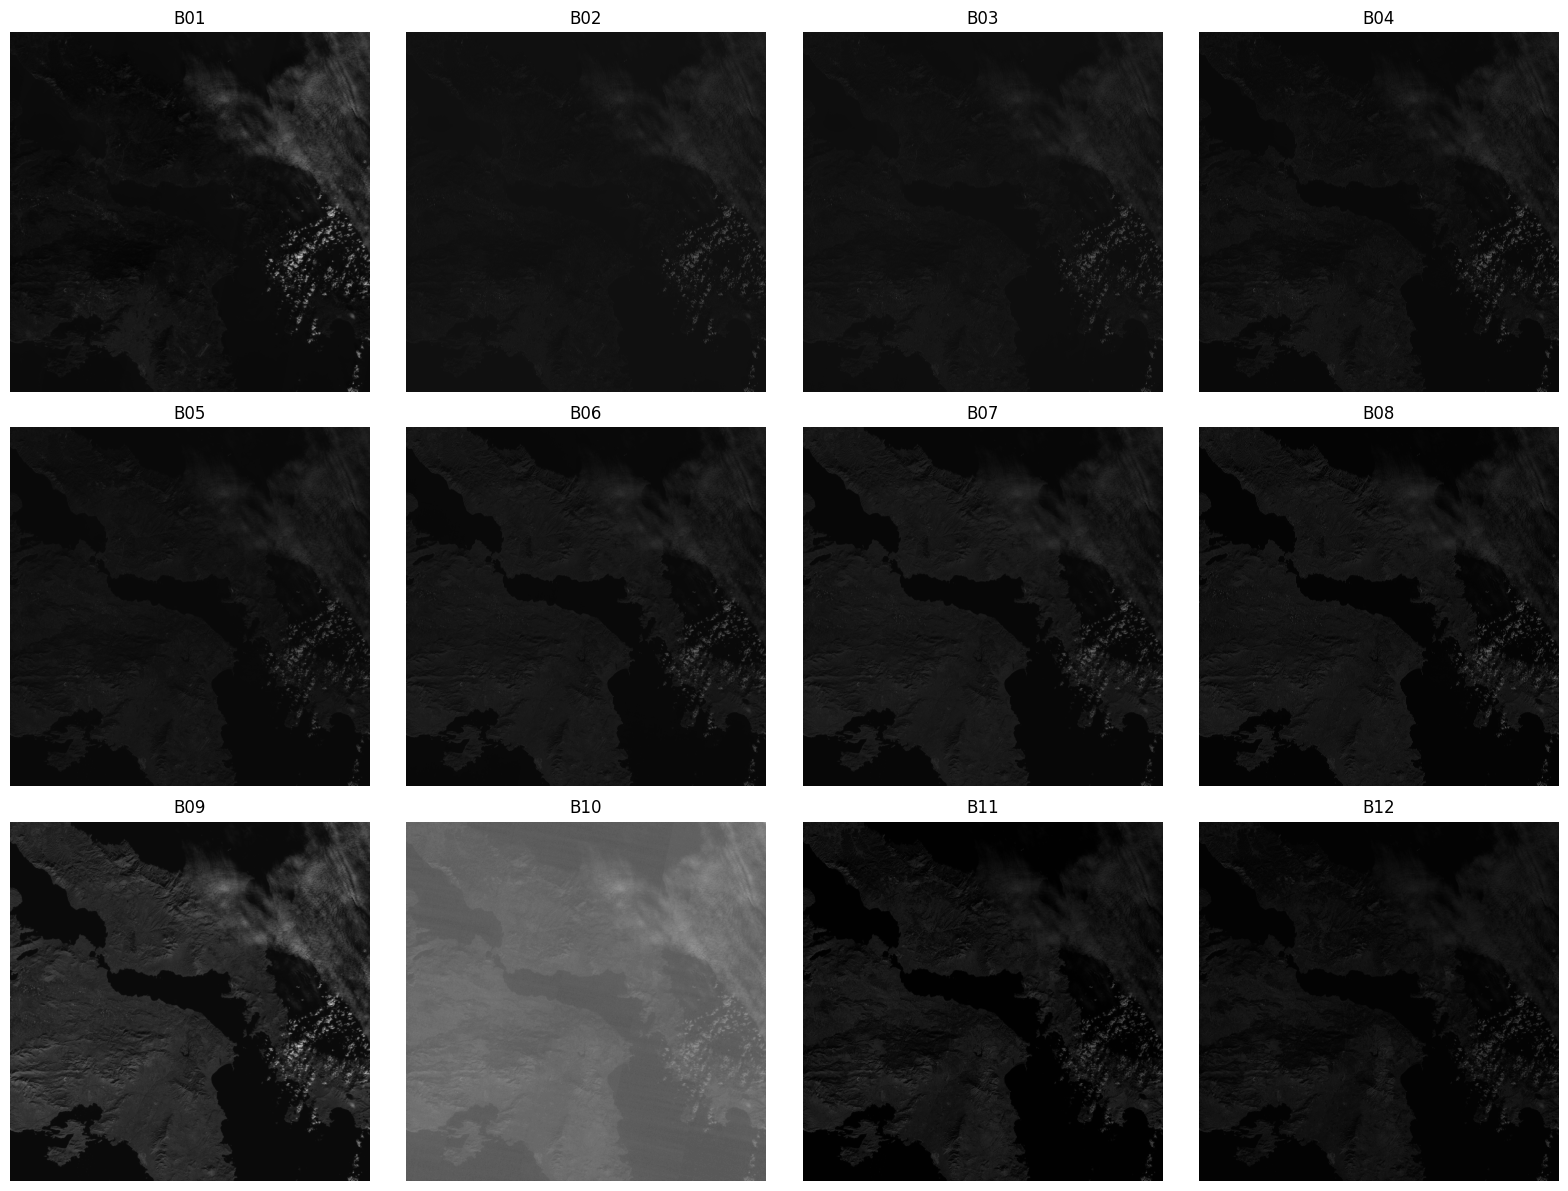

In [4]:
bandas = {
    "B01": B01,
    "B02": B02,
    "B03": B03,
    "B04": B04,
    "B05": B05,
    "B06": B06,
    "B07": B07,
    "B08": B08,
    "B09": B09,
    "B10": B10,
    "B11": B11,
    "B12": B12
}

fig, axes = plt.subplots(3, 4, figsize=(16, 12))

for i, (nombre_banda, banda) in enumerate(bandas.items()):
    ax = axes[i // 4, i % 4]
    ax.imshow(banda.read(1), cmap='gray') # Mostrar la banda en escala de grises
    ax.set_title(f"{nombre_banda}")
    ax.axis('off')

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0001..2.8].


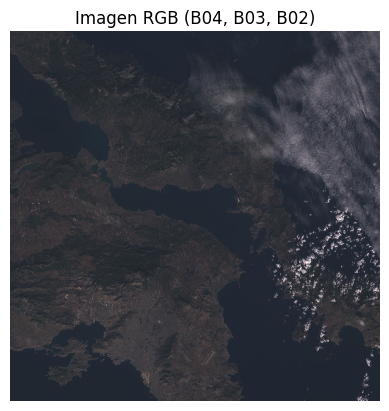

In [5]:
red = B04.read(1) / 10000
green = B03.read(1) / 10000
blue = B02.read(1) / 10000

imagen_rgb = np.dstack((red, green, blue))

plt.imshow(imagen_rgb)
plt.title("Imagen RGB (B04, B03, B02)")
plt.axis('off')
plt.show()

## Sección 3.3: Validación y verificación de los metadatos

In [6]:
with rasterio.open(path_imagen1 + 'B04.jp2') as dataset:
    metadata = dataset.meta
    print(metadata)

{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 34N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",21],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32634"]]'), 'transform': Affine(10.0, 0.0, 699960.0,
       0.0, -10.0, 4300020.0)}


# Sección 4: Identificación y corrección de errores

## Sección 4.2: Localización de errores

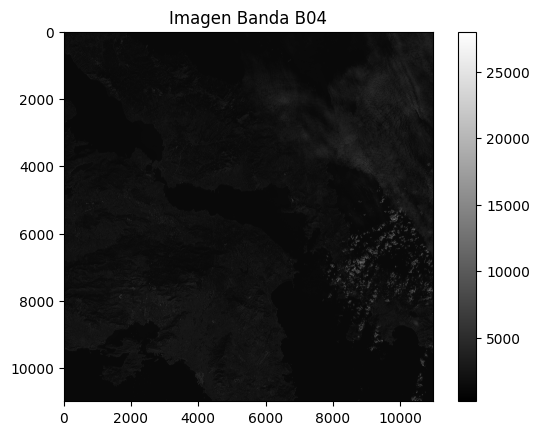

Valor mínimo: 239
Valor máximo: 28000
Media: 1899.4143473230015


In [7]:
path_banda = "../datos/Imagen1/T34SGH_20241125T091321_B04.jp2"

with rasterio.open(path_banda) as dataset:
    banda = dataset.read(1)

    plt.imshow(banda, cmap='gray')
    plt.title("Imagen Banda B04")
    plt.colorbar()
    plt.show()

    nodata_value = dataset.nodata
    if nodata_value is not None:
        print(f"Valor nodata: {nodata_value}")
        banda[banda == nodata_value] = np.nan
        plt.imshow(banda, cmap='gray')
        plt.title("Imagen Banda B04 (sin nodata)")
        plt.colorbar()
        plt.show()

    print(f"Valor mínimo: {np.min(banda)}")
    print(f"Valor máximo: {np.max(banda)}")
    print(f"Media: {np.mean(banda)}")

## Sección 4.3: Métodos aplicados para la corrección de errores

### Sección 4.3.1: Corrección de valores nodata

Valor nodata: None


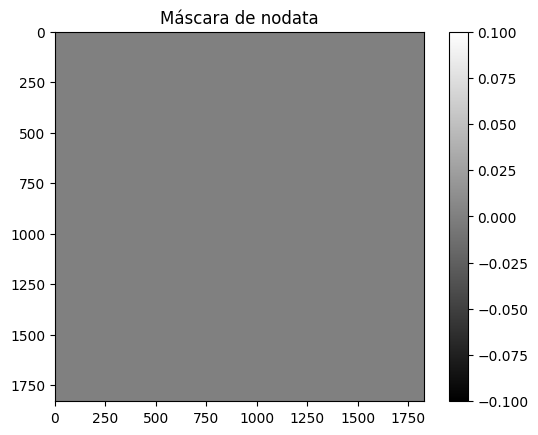

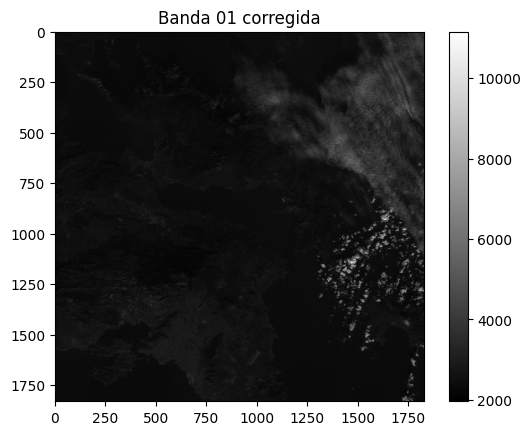

Imagen corregida guardada en: ../datos/Imagen1/bandasCorregidas\Banda_01_corregida.jp2


In [8]:
banda_1 = B01.read(1)

nodata_value = B01.nodata
print("Valor nodata:", nodata_value)

if nodata_value is not None:
    nodata_mask = banda_1 == nodata_value
else:
    nodata_mask = np.zeros_like(banda_1, dtype=bool) # Si no hay valor nodata definido

plt.imshow(nodata_mask, cmap='gray')
plt.title('Máscara de nodata')
plt.colorbar()
plt.show()

# Rellenamos los valores nodata con el valor medio
media_banda_1 = np.nanmean(banda_1)
banda_1_corregida = np.where(nodata_mask, media_banda_1, banda_1)

# Visualizar la banda corregida
plt.imshow(banda_1_corregida, cmap='gray')
plt.title('Banda 01 corregida')
plt.colorbar()
plt.show()

banda_1_corregida_uint16 = banda_1_corregida.astype(np.uint16)
output_dir = "../datos/Imagen1/bandasCorregidas"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "Banda_01_corregida.jp2")

with rasterio.open(output_path, 'w', driver='JP2OpenJPEG', 
                   height=banda_1.shape[0], width=banda_1.shape[1], count=1, dtype='uint16',
                   crs=B01.crs, transform=B01.transform, nodata=nodata_value) as dst:
    dst.write(banda_1_corregida_uint16, 1)

print(f"Imagen corregida guardada en: {output_path}")

Valor nodata: None


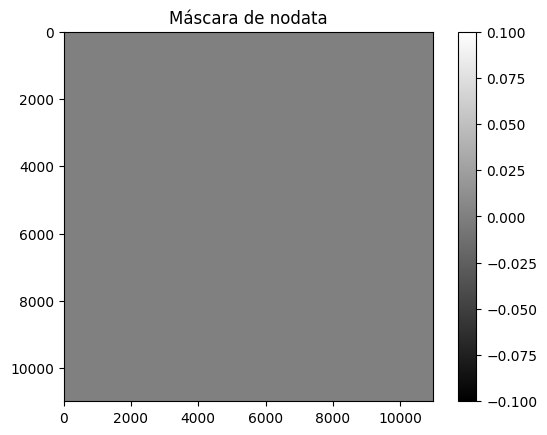

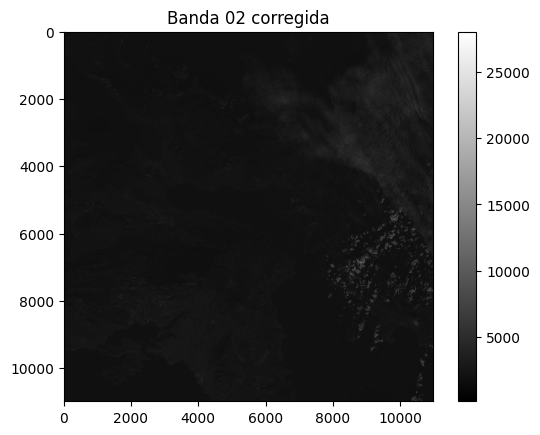

Imagen corregida guardada en: ../datos/Imagen1/bandasCorregidas\Banda_02_corregida.jp2


In [9]:
banda_2 = B02.read(1)

nodata_value = B02.nodata
print("Valor nodata:", nodata_value)

if nodata_value is not None:
    nodata_mask = banda_2 == nodata_value
else:
    nodata_mask = np.zeros_like(banda_2, dtype=bool) # Si no hay valor nodata definido

plt.imshow(nodata_mask, cmap='gray')
plt.title('Máscara de nodata')
plt.colorbar()
plt.show()

# Rellenamos los valores nodata con el valor medio
media_banda_2 = np.nanmean(banda_2)
banda_2_corregida = np.where(nodata_mask, media_banda_2, banda_2)

# Visualizar la banda corregida
plt.imshow(banda_2_corregida, cmap='gray')
plt.title('Banda 02 corregida')
plt.colorbar()
plt.show()

banda_2_corregida_uint16 = banda_2_corregida.astype(np.uint16)
output_dir = "../datos/Imagen1/bandasCorregidas"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "Banda_02_corregida.jp2")

with rasterio.open(output_path, 'w', driver='JP2OpenJPEG', 
                   height=banda_2.shape[0], width=banda_2.shape[1], count=1, dtype='uint16',
                   crs=B02.crs, transform=B02.transform, nodata=nodata_value) as dst:
    dst.write(banda_2_corregida_uint16, 1)

print(f"Imagen corregida guardada en: {output_path}")

Valor nodata: None


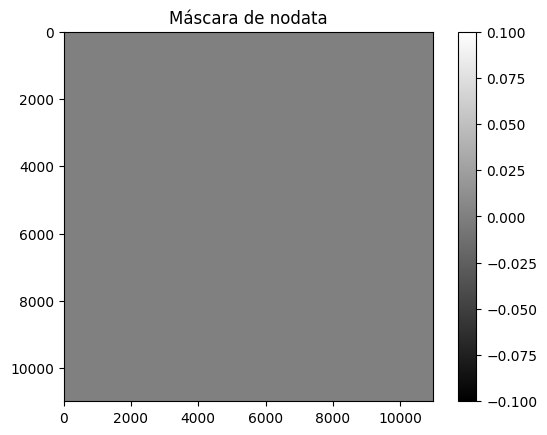

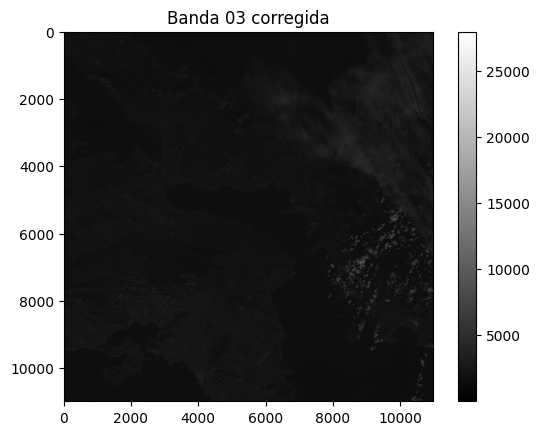

Imagen corregida guardada en: ../datos/Imagen1/bandasCorregidas\Banda_03_corregida.jp2


In [10]:
banda_3 = B03.read(1)

nodata_value = B03.nodata
print("Valor nodata:", nodata_value)

if nodata_value is not None:
    nodata_mask = banda_3 == nodata_value
else:
    nodata_mask = np.zeros_like(banda_3, dtype=bool) # Si no hay valor nodata definido

plt.imshow(nodata_mask, cmap='gray')
plt.title('Máscara de nodata')
plt.colorbar()
plt.show()

# Rellenamos los valores nodata con el valor medio
media_banda_3 = np.nanmean(banda_3)
banda_3_corregida = np.where(nodata_mask, media_banda_3, banda_3)

# Visualizar la banda corregida
plt.imshow(banda_3_corregida, cmap='gray')
plt.title('Banda 03 corregida')
plt.colorbar()
plt.show()

banda_3_corregida_uint16 = banda_3_corregida.astype(np.uint16)
output_dir = "../datos/Imagen1/bandasCorregidas"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "Banda_03_corregida.jp2")

with rasterio.open(output_path, 'w', driver='JP2OpenJPEG', 
                   height=banda_3.shape[0], width=banda_3.shape[1], count=1, dtype='uint16',
                   crs=B03.crs, transform=B03.transform, nodata=nodata_value) as dst:
    dst.write(banda_3_corregida_uint16, 1)

print(f"Imagen corregida guardada en: {output_path}")

### Sección 4.3.2: Corrección de valores fuera del rango esperado

Valor mínimo corregido: 1968
Valor máximo corregido: 10000
Media corregida: 2647.4990154976263


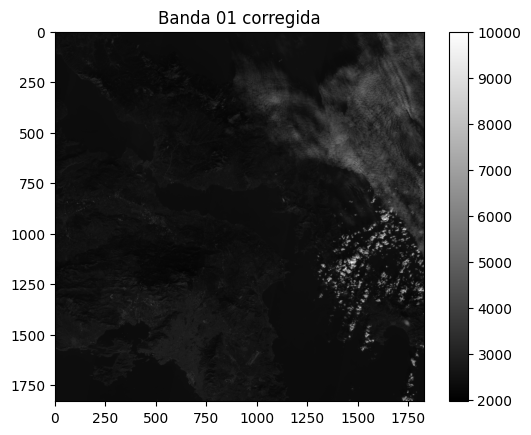

Imagen corregida guardada en: ../datos/Imagen1/bandasCorregidas\Banda_01_corregida.jp2


In [11]:
min_val = 0
max_val = 10000

banda_1 = B01.read(1)

banda_1_corregida = banda_1.copy()

# Corrección de valores fuera de rango:
banda_1_corregida[banda_1_corregida < min_val] = min_val
banda_1_corregida[banda_1_corregida > max_val] = max_val

print(f"Valor mínimo corregido: {banda_1_corregida.min()}")
print(f"Valor máximo corregido: {banda_1_corregida.max()}")
print(f"Media corregida: {banda_1_corregida.mean()}")

# Visualizar la banda corregida
plt.imshow(banda_1_corregida, cmap='gray')
plt.title('Banda 01 corregida')
plt.colorbar()
plt.show()

banda_1_corregida_uint16 = banda_1_corregida.astype(np.uint16)
output_dir = "../datos/Imagen1/bandasCorregidas"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "Banda_01_corregida.jp2")

with rasterio.open(output_path, 'w', driver='JP2OpenJPEG', 
                   height=banda_1.shape[0], width=banda_1.shape[1], count=1, dtype='uint16',
                   crs=B01.crs, transform=B01.transform, nodata=nodata_value) as dst:
    dst.write(banda_1_corregida_uint16, 1)

print(f"Imagen corregida guardada en: {output_path}")

### Sección 4.3.3: Corrección de errores del sensor

In [12]:
path_banda1 = "../datos/Imagen1/T34SGH_20241125T091321_B01.jp2"

with rasterio.open(path_banda1) as src:
    banda = src.read(1)

suma_filas = np.sum(banda, axis=1)
filas_cero = np.where(suma_filas == 0)[0]

if len(filas_cero) > 0:
    print(f"Las siguientes filas suman 0: {filas_cero}")
else:
    print("Ninguna fila suma 0")

suma_columnas = np.sum(banda, axis=0)
columnas_cero = np.where(suma_columnas == 0)[0]

if len(columnas_cero) > 0:
    print(f"Las siguientes columnas suman 0: {columnas_cero}")
else:
    print("Ninguna columna suma 0")

if len(filas_cero)==0 & len(columnas_cero)==0:
    print("El satélite no tuvo errores en el sensor al tomar la foto")

Ninguna fila suma 0
Ninguna columna suma 0
El satélite no tuvo errores en el sensor al tomar la foto


# Sección 5: Corrección geográfica

## Sección 5.2: Verificación de la georreferenciación

Rango de valores antes de re-proyección: 1968 - 11151
Rango de valores después de re-proyección: 0 - 10961


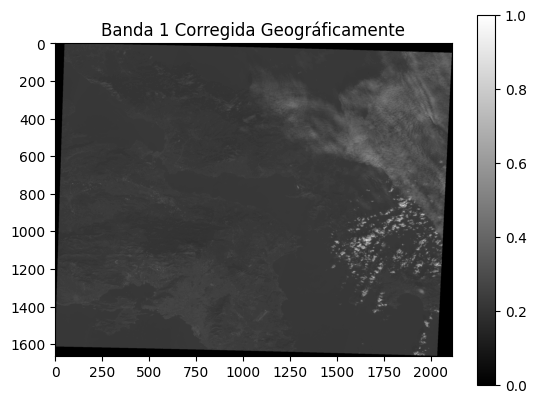

Corrección geográfica aplicada y guardada en 'Banda_1_corregida.tif'


In [13]:
from rasterio.warp import reproject, Resampling, calculate_default_transform

path_imagen_banda1 = "../datos/Imagen1/T34SGH_20241125T091321_B01.jp2"
path_salida = "../datos/Imagen1/bandasCorregidas/"

with rasterio.open(path_imagen_banda1) as src:
    crs = src.crs
    transform = src.transform
    nodata_value = src.nodata
    width = src.width
    height = src.height

    imagen_banda1 = src.read(1)

    destino_crs = "EPSG:4326"
    transform_dest, width_dest, height_dest = calculate_default_transform(
        crs, destino_crs, width, height, *src.bounds
    )

    imagen_corregida = np.empty((height_dest, width_dest), dtype=imagen_banda1.dtype)

    reproject(
        source = imagen_banda1,
        destination = imagen_corregida,
        src_transform = transform,
        src_crs = crs,
        dst_transform = transform_dest,
        dst_crs = destino_crs,
        resampling = Resampling.bilinear
    )

    print(f"Rango de valores antes de re-proyección: {imagen_banda1.min()} - {imagen_banda1.max()}")
    print(f"Rango de valores después de re-proyección: {imagen_corregida.min()} - {imagen_corregida.max()}")

    imagen_corregida_display = imagen_corregida.astype(float)
    imagen_corregida_display[imagen_corregida_display == nodata_value] = np.nan

    max_val = np.nanmax(imagen_corregida_display)
    if max_val > 0:
        imagen_corregida_display /= max_val

    plt.imshow(imagen_corregida_display, cmap='gray')
    plt.title('Banda 1 Corregida Geográficamente')
    plt.colorbar()
    plt.show()

    with rasterio.open(
        os.path.join(path_salida, "Banda_1_corregida.tif"), 
        'w', driver = 'GTiff',
        height = height_dest, width = width_dest, count = 1,
        dtype = imagen_banda1.dtype, crs = destino_crs,
        transform = transform_dest, nodata = nodata_value
    ) as dst:
        dst.write(imagen_corregida, 1)

    print("Corrección geográfica aplicada y guardada en 'Banda_1_corregida.tif'")

# Sección 6: Aplicación de índices de vegetación

## Sección 6.2: Implementación de los índices

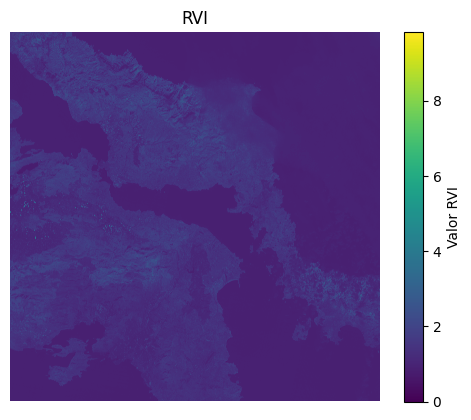

In [14]:
red = B04.read(1).astype(float)
nir = B08.read(1).astype(float)

rvi = nir / red

rvi[np.isnan(rvi)] = -9999

plt.imshow(rvi, cmap='viridis', vmin=0, vmax=np.nanmax(rvi))
plt.title("RVI")
plt.colorbar(label="Valor RVI")
plt.axis('off')
plt.show()

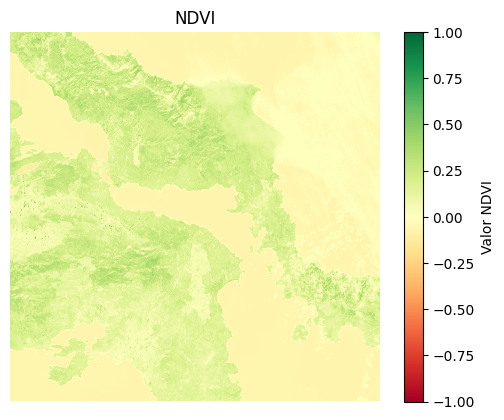

In [15]:
red = B04.read(1).astype(float)
nir = B08.read(1).astype(float)

ndvi = (nir - red) / (nir + red)

ndvi[np.isnan(ndvi)] = -9999

plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("NDVI")
plt.colorbar(label="Valor NDVI")
plt.axis('off')
plt.show()

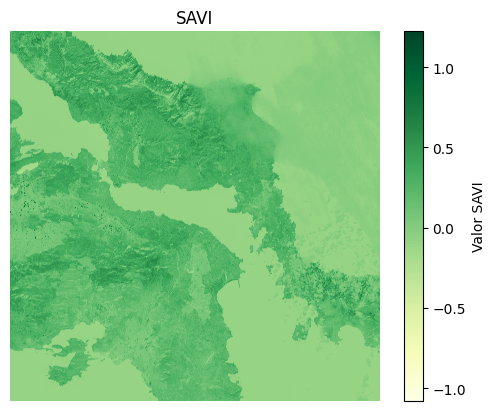

In [16]:
red = B04.read(1).astype('float32')
nir = B08.read(1).astype('float32')

L = 0.5
savi = ((nir - red) / (nir + red + L)) * (1 + L)

savi[np.isinf(savi)] = np.nan

plt.imshow(savi, cmap='YlGn')
plt.title('SAVI')
plt.colorbar(label='Valor SAVI')
plt.axis('off')
plt.show()

C:\Users\frang\AppData\Local\Temp\ipykernel_67628\1486470524.py:7: RuntimeWarning: invalid value encountered in sqrt
  tvi = np.sqrt((ndvi + 0.5))


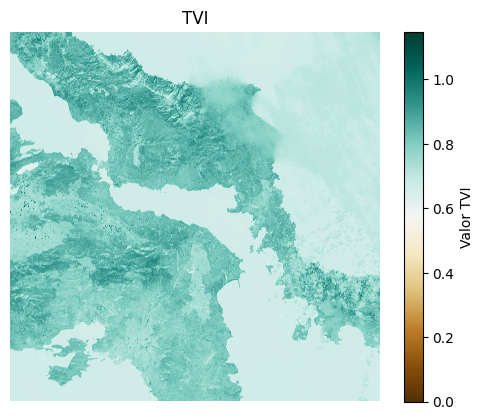

In [17]:
red = B04.read(1).astype('float32')
nir = B08.read(1).astype('float32')

ndvi = (nir - red) / (nir + red)
ndvi[np.isinf(ndvi)] = np.nan

tvi = np.sqrt((ndvi + 0.5))

tvi[np.isnan(tvi)] = 0

plt.imshow(tvi, cmap='BrBG')
plt.title('TVI')
plt.colorbar(label='Valor TVI')
plt.axis('off')
plt.show()

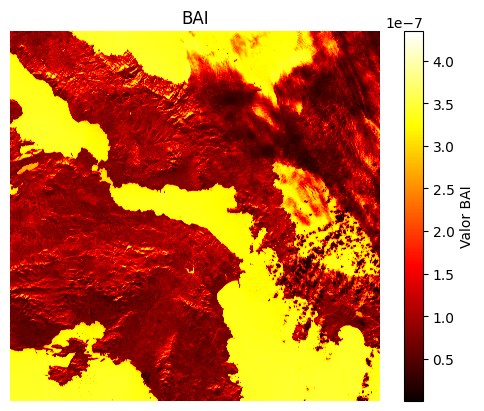

In [18]:
red = B04.read(1).astype('float32')
nir = B08.read(1).astype('float32')

bai = 1 / (((red - 0.06) ** 2) + ((nir - 0.1) ** 2))
bai[np.isinf(bai)] = np.nan

plt.imshow(bai, cmap='hot')
plt.title('BAI')
plt.colorbar(label='Valor BAI')
plt.axis('off')
plt.show()

# Sección 7: Transformaciones

In [19]:
banda_min = np.min(red)
banda_max = np.max(red)
banda_normalizada = (red - banda_min) / (banda_max - banda_min) * 255
red_norm = banda_normalizada.astype(np.uint8)

In [20]:
def diezmado(img, R):
    paso = int(1 / R)
    resimg = img[::paso, ::paso]
    
    return resimg

In [21]:
red_diez = diezmado(red_norm, 0.1)

## Sección 7.1: Histogramas

In [22]:
def histograma(img):
    val, frec = np.unique(img, return_counts=True) # diccionario contador
    
    plt.figure(figsize=(10, 6))
    plt.bar(val, frec, color='gray', width=1.0)
    plt.title('Histograma')
    plt.xlabel('Píxel')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

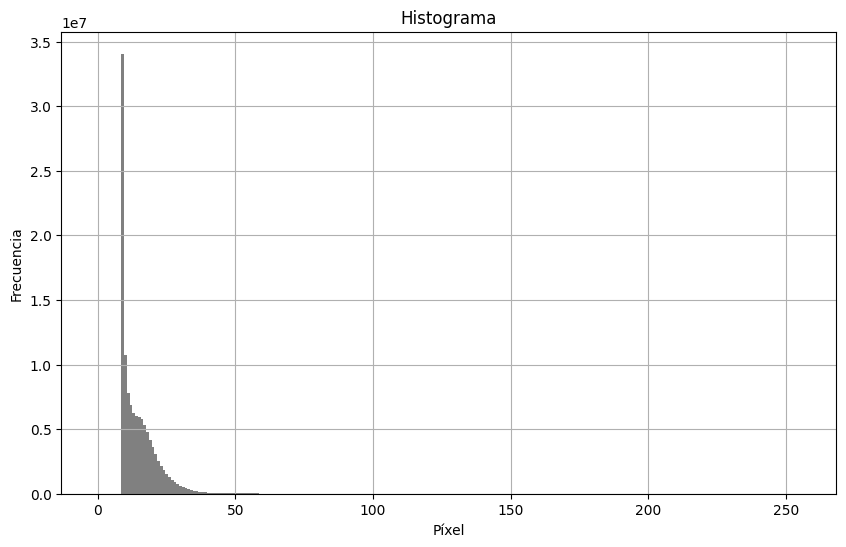

In [23]:
histograma(red_norm)

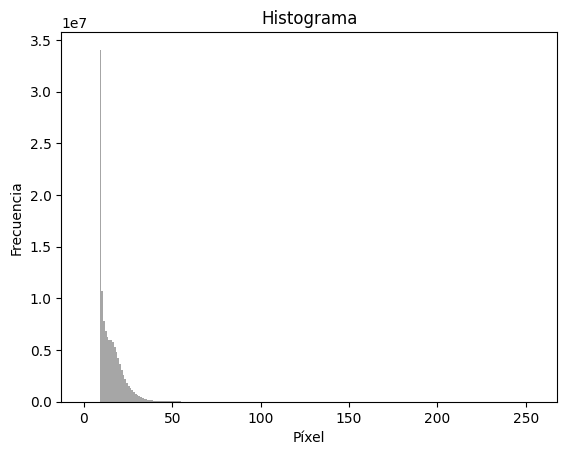

In [24]:
# Comprobación:
plt.hist(red_norm.ravel(), bins=256, range=(0, 255), color='gray', alpha=0.7)
plt.title('Histograma')
plt.xlabel('Píxel')
plt.ylabel('Frecuencia')
plt.show()

In [25]:
def expan(img, cmin, cmax):
    resimg = img.copy()
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            NDij = img[i, j]
            if NDij <= cmin:
                resimg[i, j] = 0 # nuevo límite inferior
            elif NDij >= cmax:
                resimg[i, j] = 255 # nuevo límite superior
            else:
                resimg[i, j] = (NDij - cmin) * (255) / (cmax - cmin)
    
    return resimg

In [26]:
def expan(img, cmin, cmax):
    resimg = img.copy().astype(np.float32)
    
    resimg = np.clip(resimg, cmin, cmax)
    resimg = (resimg - cmin) * 255 / (cmax - cmin)
    
    resimg = resimg.astype(np.uint8)
    return resimg

In [27]:
red_expan = expan(red_norm, 10, 200)

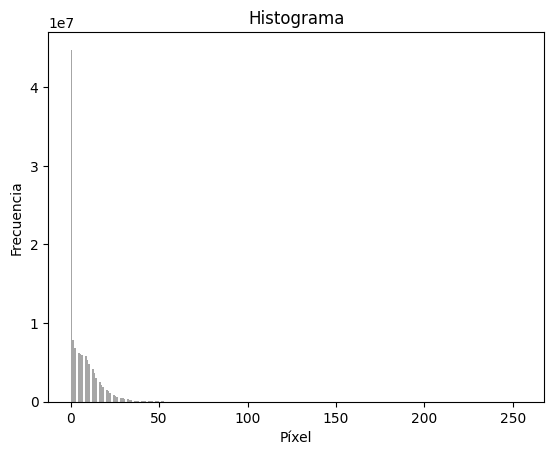

In [28]:
plt.hist(red_expan.ravel(), bins=256, range=(0, 255), color='gray', alpha=0.7)
plt.title('Histograma')
plt.xlabel('Píxel')
plt.ylabel('Frecuencia')
plt.show()

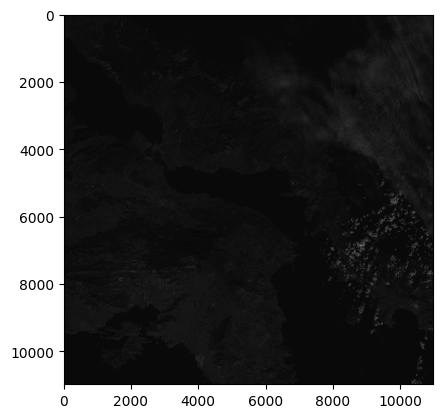

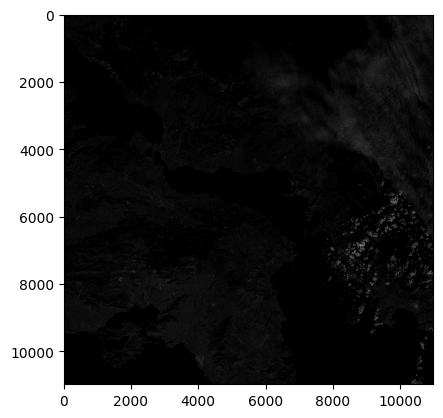

In [29]:
plt.figure(1)
plt.imshow(red_norm, cmap='gray')

plt.figure(2)
plt.imshow(red_expan, cmap='gray')

In [30]:
def corte(img, porc):
    resimg = img.copy() 
    dic = {x : 0 for x in range(256)}
    for f in img: 
        for v in f:
            dic[v] += 1 
   
    frec = list(dic.values())  
    num_pixel_corte = (img.size * porc)
    
    NDcortemin = 0
    NDcortemax = 255
    
    ac = 0
    for x in range(1,256):
        ac += frec[x]
        if ac > num_pixel_corte:
            NDcortemin = x
            break
    
    v = 0
    for x in range(255, 0, -1):
        v += frec[x]
        if v > num_pixel_corte:
            NDcortemax = x
            break

    for i in range(resimg.shape[0]):         
        for j in range(resimg.shape[1]):     
            if resimg[i,j] <= NDcortemin:
                resimg[i,j] = 0               
            elif resimg[i,j] >= NDcortemax:       
                resimg[i,j] = 255             
            else:                            
                resimg[i,j] = 0 + ((resimg[i,j]-NDcortemin) / (NDcortemax-NDcortemin)) * 255
    
    return resimg

In [31]:
red_corte = corte(red_diez, 0.02)

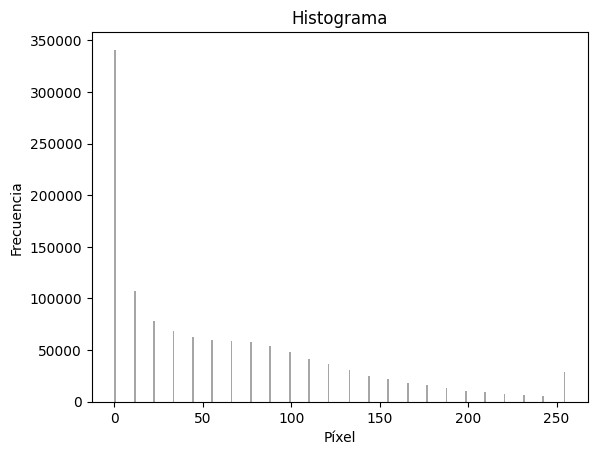

In [32]:
plt.hist(red_corte.ravel(), bins=256, range=(0, 255), color='gray', alpha=0.7)
plt.title('Histograma')
plt.xlabel('Píxel')
plt.ylabel('Frecuencia')
plt.show()

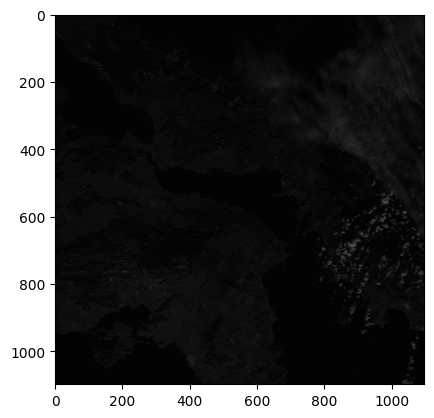

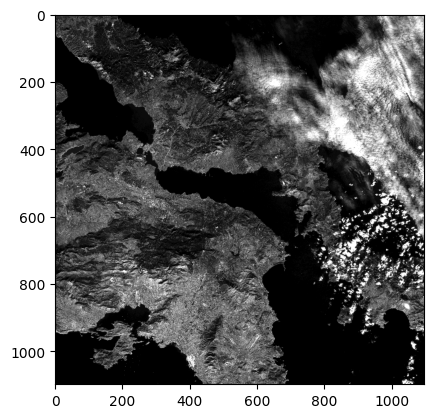

In [33]:
plt.figure(1)
plt.imshow(red_diez, cmap='gray')

plt.figure(2)
plt.imshow(red_corte, cmap='gray')

In [34]:
def ecual(img):
    resimg = img.copy()
    val, frec = np.unique(img, return_counts=True)
    frecuencia_acumulada = np.cumsum(frec)
    num_pixeles = img.size
    fe = 255 / num_pixeles
    frecuencia_escalada = np.rint(fe * frecuencia_acumulada).astype(int)
    dic = dict(zip(val, frecuencia_escalada))
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            resimg[i, j] = dic[img[i, j]]
    
    return resimg

In [35]:
red_ecual = ecual(red_diez)

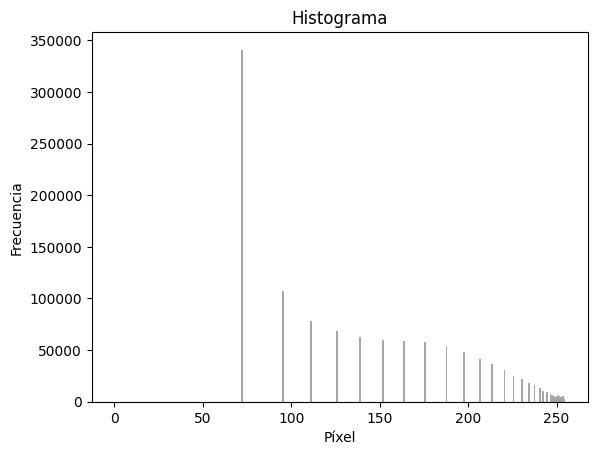

In [36]:
plt.hist(red_ecual.ravel(), bins=256, range=(0, 255), color='gray', alpha=0.7)
plt.title('Histograma')
plt.xlabel('Píxel')
plt.ylabel('Frecuencia')
plt.show()

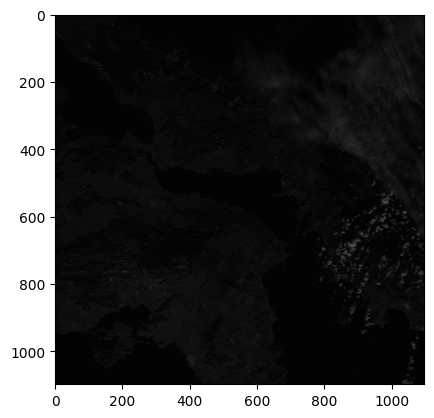

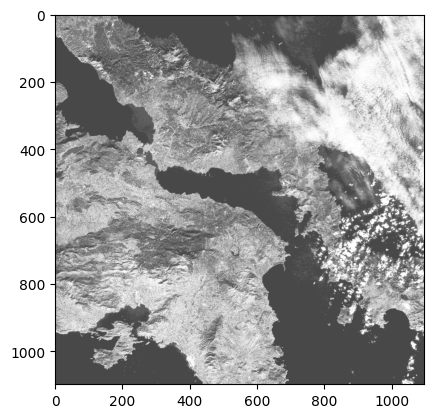

In [37]:
plt.figure(1)
plt.imshow(red_diez, cmap='gray')

plt.figure(2)
plt.imshow(red_ecual, cmap='gray')

## Sección 7.2: Filtros

In [38]:
def filtro(img, cf):
    if cf.shape[0] != cf.shape[1]:
        raise ValueError("La matriz de filtro tiene que ser cuadrada")
    
    resimg = img.copy()
    num_filas, num_columnas = img.shape
    resimg = np.zeros((num_filas, num_columnas))
    cf_suma = np.sum(cf)
    
    for i in range(1, num_filas - 1): 
        for j in range(1, num_columnas - 1):
            suma = 0
            for k in range(-1, 2):
                for l in range(-1, 2):
                    suma += img[i+k, j+l] * cf[k+1, l+1]
            resimg[i, j] = round(suma/cf_suma)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Imagen original")
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Imagen después del filtro")
    plt.imshow(resimg, cmap='gray')
    plt.axis('off')
    
    plt.show()
    
    return resimg

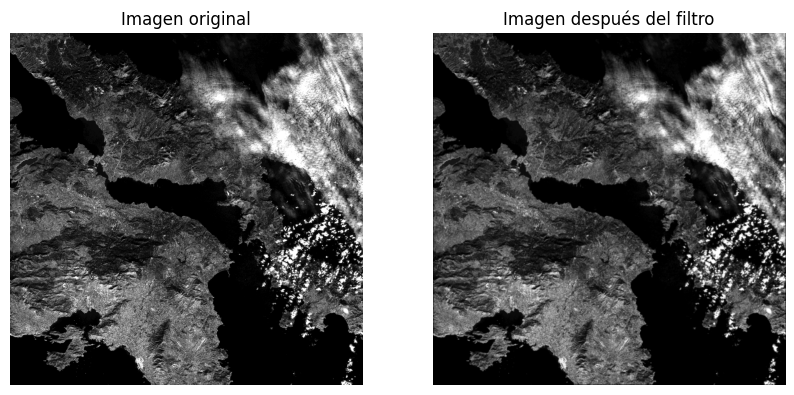

In [39]:
# Filtro de suavizado:
cf1 = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

resimg_suavizado = filtro(red_corte, cf1)

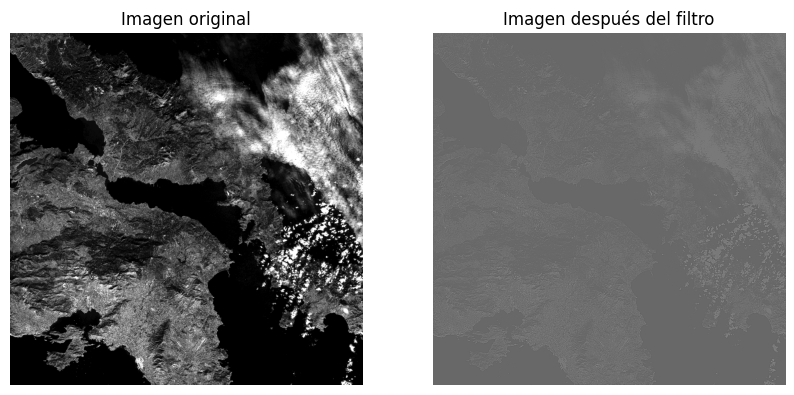

In [40]:
# Filtro de paso de alta:
cf2 = np.array([
    [-1., -1., -1.],
    [-1., 9, -1.],
    [-1., -1., -1.]
])

resimg_pasoalta = filtro(red_corte, cf2)

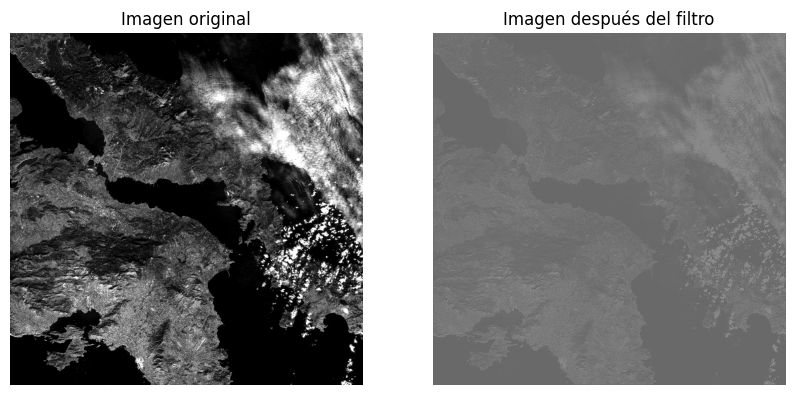

In [41]:
# Filtro de realce:
cf3 = np.array([
    [0, -1., 0],
    [-1., 5., -1.],
    [0, -1., 0]
])

resimg_realce = filtro(red_corte, cf3)

In [42]:
def sobel(img):
    num_filas, num_columnas = img.shape
    resimg = np.zeros((num_filas, num_columnas))

    for i in range(1, num_filas - 1):
        for j in range(1, num_columnas - 1):
            C = (img[i-1, j+1] + 2 * img[i, j+1] + img[i+1, j+1]) - (img[i-1, j-1] + 2 * img[i, j-1] + img[i+1, j-1])
            F = (img[i-1, j-1] + 2 * img[i-1, j] + img[i-1, j+1]) - (img[i+1, j-1] + 2 * img[i+1, j] + img[i+1, j+1])
            resimg[i, j] = round(np.sqrt(C**2 + F**2))
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Imagen original")
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Imagen después del filtro de Sobel")
    plt.imshow(resimg, cmap='gray')
    plt.axis('off')
    
    plt.show()
    
    return resimg

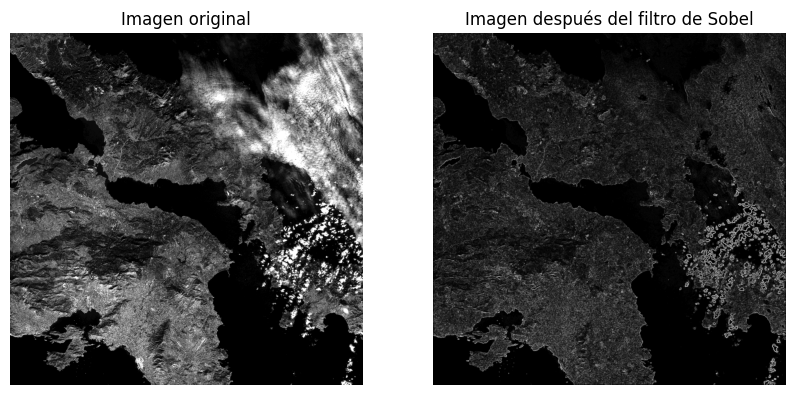

In [43]:
resimg_sobel = sobel(red_corte)

## Sección 7.3: Escalado

In [44]:
def amplia(img, R=2):
    num_filas, num_columnas = img.shape
    num_filas_res = R * num_filas
    num_columnas_res = R * num_columnas
    
    resimg = np.zeros((num_filas_res, num_columnas_res))
    
    resimg[::R, ::R] = img # valores originales
    
    # filas:
    for i in range(1, num_filas_res-1, R):
        for j in range(num_columnas_res):
            resimg[i, j] = (resimg[i - 1, j] + resimg[i + 1, j]) / 2
    
    # columnas:
    for i in range(0, num_filas_res, R):
        for j in range(1, num_columnas_res-1, R):
            resimg[i, j] = (resimg[i, j - 1] + resimg[i, j + 1]) / 2
    
    resimg[-1, :] = resimg[-2, :] # última fila
    resimg[:, -1] = resimg[:, -2] # última columna
    
    return resimg

In [45]:
def mascara(img, mask):
    resimg = img * mask
    return resimg

In [46]:
def calculaMask(img, NDmin, NDmax):
    mask = np.zeros(img.shape, dtype=np.int16)
    mask[(img > NDmin) & (img < NDmax)] = 1
    return mask

In [47]:
mask_luces = calculaMask(red_corte, 100, 180)
msk_img_luces = mascara(red_corte, mask_luces)

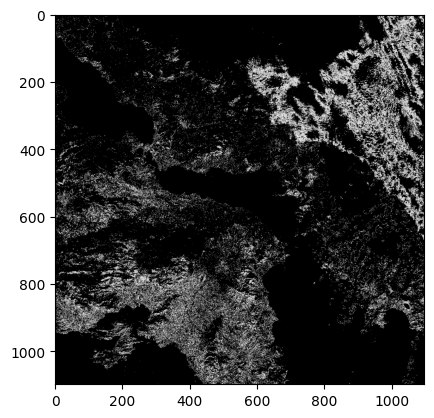

In [48]:
plt.imshow(msk_img_luces, cmap='gray')

In [49]:
mask_nubes = calculaMask(red_corte, 200, 255)
msk_img_nubes = mascara(red_corte, mask_nubes)

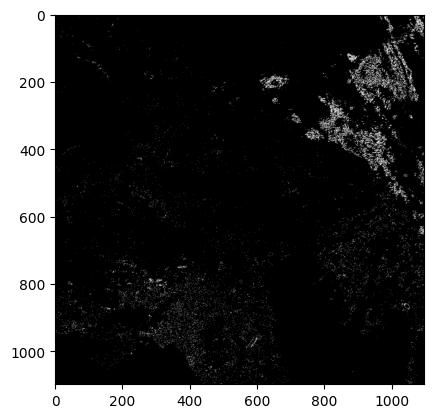

In [50]:
plt.imshow(msk_img_nubes, cmap='gray')

## Sección 7.4: Clasificación

In [51]:
def isodata(img, C):
    max_iter = 100
    tol = 0.001
    
    # Paso 1: Elegir aleatoriamente los centros iniciales de las clases
    pixeles_no_negros = img[np.any(img > 0, axis=-1)].reshape(-1, img.shape[2])
    indices = np.random.choice(pixeles_no_negros.shape[0], size=C, replace=False)
    v = pixeles_no_negros[indices].astype(float) # Centros aleatorios

    resimg = np.zeros((img.shape[0], img.shape[1]), dtype=int)

    for it in range(max_iter):
        # Paso 2: Clasificar cada píxel al centro más cercano
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if np.all(img[i, j] == 0): # Píxel negro
                    resimg[i, j] = 0
                else:
                    distancias = np.linalg.norm(img[i, j] - v, axis=1) # Distancia euclídea
                    resimg[i, j] = np.argmin(distancias) + 1 # Clase c+1 para el resto

        # Paso 3: Valor medio de los puntos asignados a cada clase
        nuevos_centros = np.zeros_like(v) # Inicializamos los nuevos centros
        conteo_píxeles = np.zeros(C, dtype=int) # Contadores para cada clase

        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if resimg[i, j] == 0:
                    continue # Ignoramos píxel negro
                cluster_actual = resimg[i, j] - 1 # Convertir clase c+1 a índice c
                nuevos_centros[cluster_actual] += img[i, j]
                conteo_píxeles[cluster_actual] += 1

        # Actualizar los centros dividiendo por el número de píxeles en cada clase
        for c in range(C):
            if conteo_píxeles[c] > 0:
                nuevos_centros[c] /= conteo_píxeles[c]
            else:
                # Si un cluster queda vacío, mantener su centro anterior
                nuevos_centros[c] = v[c]

        # Paso 4: Convergencia
        if np.linalg.norm(nuevos_centros - v) < tol:
            break

        # Paso 5: Actualizar los centros para la siguiente iteración
        v = nuevos_centros

    return resimg

In [52]:
def seudo(img):
    resimg = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
    i = 0
    while i < img.shape[0]:
        j = 0
        while j < img.shape[1]:
            if img[i, j] == 0:
                resimg[i, j, :] = [255, 0, 0]
            elif img[i, j] == 1:
                resimg[i, j, :] = [0, 255, 0]
            elif img[i,j] == 2:
                resimg[i, j, :] = [0, 0, 255]
            elif img[i, j] == 3:
                resimg[i, j, :] = [255, 255, 0]
            elif img[i, j] == 4:
                resimg[i, j, :] = [0, 255, 255]
            elif img[i, j] == 5:
                resimg[i, j, :] = [255, 0, 255]
            else:
                resimg[i, j, :] = [0, 0, 0]
            j = j+1
        i = i+1
    return resimg

In [53]:
imagen_rgb_diez = diezmado(imagen_rgb, 0.1)

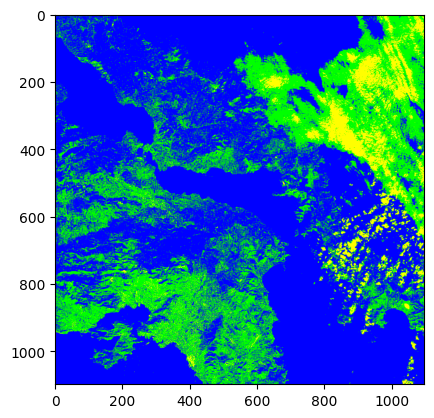

In [54]:
res = isodata(imagen_rgb_diez, 3)
res_seudo = seudo(res)
plt.figure(1)
plt.imshow(res_seudo)